# 🚀 Fraud Detection Model Demo

This notebook demonstrates how to use your trained BERT model for fraud detection.

## 📊 Model Overview
- **Model Type**: BERT-based multiclass classifier
- **Classes**: 9 types (legitimate + 8 fraud types)
- **Input**: Text messages
- **Output**: Fraud classification with confidence scores

## 🎯 Fraud Types Detected
1. **Legitimate** - Normal, safe messages
2. **Phishing** - Attempts to steal credentials/personal info
3. **Tech Support Scam** - Fake technical support calls/messages
4. **Reward Scam** - Fake prizes/lottery winnings
5. **Job Scam** - Fraudulent employment opportunities
6. **SMS Spam** - Unwanted promotional messages
7. **Popup Scam** - Fake security alerts/warnings
8. **Refund Scam** - Fake refund/billing notifications
9. **SSN Scam** - Social Security number theft attempts

In [1]:
# Install required packages if needed (uncomment the next line if you need to install)
# !pip install torch transformers pandas numpy matplotlib seaborn

# If you get ModuleNotFoundError, restart your kernel (Kernel -> Restart) and run this cell again

import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import BertTokenizer, BertForSequenceClassification
import warnings
warnings.filterwarnings('ignore')

print("✅ Libraries imported successfully!")
print(f"🔧 PyTorch version: {torch.__version__}")
print(f"💻 Device: {'GPU' if torch.cuda.is_available() else 'CPU'}")
if torch.cuda.is_available():
    print(f"🚀 GPU: {torch.cuda.get_device_name(0)}")
print(f"🤖 Transformers version: {__import__('transformers').__version__}")

✅ Libraries imported successfully!
🔧 PyTorch version: 2.7.0
💻 Device: CPU
🤖 Transformers version: 4.51.3


## 🔧 Troubleshooting

If you encounter `ModuleNotFoundError`, try these steps:

1. **Restart Kernel**: Go to `Kernel` → `Restart` and run the cell above again
2. **Install packages**: Uncomment and run: `!pip install torch transformers pandas numpy matplotlib seaborn`
3. **Check installation**: Run `!pip list | grep transformers` to verify installation
4. **Alternative installation**: Try `!conda install -c huggingface transformers` or `!pip install --upgrade transformers`

### Quick Package Installation
Run this cell if you need to install packages:

In [2]:
# Uncomment and run this cell if you need to install packages
# !pip install torch transformers pandas numpy matplotlib seaborn

# Check if packages are available
try:
    import torch
    import transformers
    print("✅ All required packages are available!")
    print(f"📦 PyTorch: {torch.__version__}")
    print(f"🤖 Transformers: {transformers.__version__}")
except ImportError as e:
    print(f"❌ Missing package: {e}")
    print("💡 Please install missing packages using the pip command above")

✅ All required packages are available!
📦 PyTorch: 2.7.0
🤖 Transformers: 4.51.3


In [3]:
# Load your trained model and tokenizer
MODEL_PATH = '../models/bert_model'
TOKENIZER_PATH = '../models/bert_tokenizer'

# CORRECTED Class labels - MUST match the LabelEncoder order from training
# The LabelEncoder sorts alphabetically, so the order is:
CLASS_LABELS = [
    'job_scam',        # 0
    'legitimate',      # 1  
    'phishing',        # 2
    'popup_scam',      # 3
    'refund_scam',     # 4
    'reward_scam',     # 5
    'sms_spam',        # 6
    'ssn_scam',        # 7
    'tech_support_scam' # 8
]

print("📥 Loading model and tokenizer...")

try:
    # Load tokenizer
    tokenizer = BertTokenizer.from_pretrained(TOKENIZER_PATH)
    print("✅ Tokenizer loaded!")
    
    # Load model
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model = BertForSequenceClassification.from_pretrained(MODEL_PATH)
    model.to(device)
    model.eval()
    print("✅ Model loaded and ready!")
    
    print(f"🎯 Model supports {len(CLASS_LABELS)} classes")
    print(f"📋 Classes: {', '.join(CLASS_LABELS)}")
    print(f"🔍 CORRECTED label mapping (alphabetical order from LabelEncoder):")
    for i, label in enumerate(CLASS_LABELS):
        print(f"  {i}: {label}")
    
except Exception as e:
    print(f"❌ Error loading model: {e}")
    print("\n💡 Troubleshooting:")
    print("1. Make sure model files are in the '../models/' directory")
    print("2. Check that you downloaded the model from Kaggle correctly")
    print("3. Verify the file structure matches the expected paths")

📥 Loading model and tokenizer...
✅ Tokenizer loaded!
✅ Model loaded and ready!
🎯 Model supports 9 classes
📋 Classes: job_scam, legitimate, phishing, popup_scam, refund_scam, reward_scam, sms_spam, ssn_scam, tech_support_scam
🔍 CORRECTED label mapping (alphabetical order from LabelEncoder):
  0: job_scam
  1: legitimate
  2: phishing
  3: popup_scam
  4: refund_scam
  5: reward_scam
  6: sms_spam
  7: ssn_scam
  8: tech_support_scam


In [4]:
# Load real fraud detection dataset to use authentic examples
print("📊 Loading real fraud detection dataset...")

# Load the CSV file
csv_path = '../final_fraud_detection_dataset.csv'
try:
    import pandas as pd
    
    # Load dataset
    df = pd.read_csv(csv_path)
    print(f"✅ Dataset loaded successfully!")
    print(f"📈 Dataset shape: {df.shape}")
    print(f"📋 Columns: {df.columns.tolist()}")
    
    # Display class distribution
    print(f"\n🎯 Fraud Category Distribution:")
    class_counts = df['detailed_category'].value_counts()
    for category, count in class_counts.items():
        print(f"  {category:20s}: {count:,} samples")
    
    # Verify we have all expected categories
    expected_categories = set(CLASS_LABELS)
    available_categories = set(df['detailed_category'].unique())
    print(f"\n✅ Categories in dataset: {sorted(available_categories)}")
    print(f"🔍 Expected categories: {sorted(expected_categories)}")
    
    if expected_categories.issubset(available_categories):
        print("✅ All expected fraud categories are present in the dataset!")
    else:
        missing = expected_categories - available_categories
        print(f"⚠️  Missing categories: {missing}")
    
except Exception as e:
    print(f"❌ Error loading dataset: {e}")
    print("💡 Make sure the CSV file is in the correct location: '../final_fraud_detection_dataset.csv'")
    df = None

📊 Loading real fraud detection dataset...
✅ Dataset loaded successfully!
📈 Dataset shape: (194913, 4)
📋 Columns: ['text', 'binary_label', 'detailed_category', 'data_type']

🎯 Fraud Category Distribution:
  legitimate          : 101,717 samples
  phishing            : 71,857 samples
  popup_scam          : 11,333 samples
  sms_spam            : 6,988 samples
  reward_scam         : 606 samples
  tech_support_scam   : 605 samples
  refund_scam         : 604 samples
  ssn_scam            : 604 samples
  job_scam            : 599 samples

✅ Categories in dataset: ['job_scam', 'legitimate', 'phishing', 'popup_scam', 'refund_scam', 'reward_scam', 'sms_spam', 'ssn_scam', 'tech_support_scam']
🔍 Expected categories: ['job_scam', 'legitimate', 'phishing', 'popup_scam', 'refund_scam', 'reward_scam', 'sms_spam', 'ssn_scam', 'tech_support_scam']
✅ All expected fraud categories are present in the dataset!
✅ Dataset loaded successfully!
📈 Dataset shape: (194913, 4)
📋 Columns: ['text', 'binary_label',

In [5]:
def get_real_samples_by_category(df, category, n_samples=3):
    """
    Get real sample messages from the dataset for a specific fraud category
    
    Args:
        df: DataFrame containing the fraud detection dataset
        category: Fraud category to sample from
        n_samples: Number of samples to retrieve
        
    Returns:
        list: Sample messages from the specified category
    """
    if df is None:
        return [f"Sample {category} message (dataset not loaded)"]
    
    category_data = df[df['detailed_category'] == category]
    if len(category_data) == 0:
        return [f"No samples found for category: {category}"]
    
    # Get random samples, ensuring variety
    samples = category_data.sample(min(n_samples, len(category_data)), random_state=42)['text'].tolist()
    
    # Truncate very long messages for display
    truncated_samples = []
    for sample in samples:
        if len(sample) > 300:
            truncated_samples.append(sample[:300] + "...")
        else:
            truncated_samples.append(sample)
    
    return truncated_samples

def display_dataset_samples():
    """Display sample messages from each fraud category"""
    if df is None:
        print("❌ Dataset not loaded. Cannot display samples.")
        return
    
    print("📋 Sample Messages by Category:")
    print("=" * 80)
    
    for category in sorted(df['detailed_category'].unique()):
        samples = get_real_samples_by_category(df, category, n_samples=2)
        
        print(f"\n🏷️  {category.upper().replace('_', ' ')}")
        print("-" * 50)
        
        for i, sample in enumerate(samples, 1):
            print(f"{i}. {sample}")
        
        # Show count for this category
        count = len(df[df['detailed_category'] == category])
        print(f"   📊 Total samples in dataset: {count:,}")

# Display sample data from the real dataset
display_dataset_samples()

📋 Sample Messages by Category:

🏷️  JOB SCAM
--------------------------------------------------
1. Currently seeking an Office Assistant for our home office on a casual part time basis. This job involves personal and office assistance. Ideally, we are seeking someone who has previous experience in an administrative and/or assistant role.
2. Duties / Responsibilities: - Data entry, general filing - Type documents and correspondence - Assist ordering materials / parts - Assist with Logistics Monday through Friday 8:30am -6:00pm
   📊 Total samples in dataset: 599

🏷️  LEGITIMATE
--------------------------------------------------
1. About The Selectus Group The Selectus Group is a customer focused organisation committed to providing high quality services to employees throughout Australia. With a strong history in the Australian financial services industry, we manage salary packaging across a range of industry sectors, including...
2. martin v löwis qpnyslvloewisde thinking actually believe

In [6]:
def predict_fraud(text, max_length=128):
    """
    Predict fraud type for input text
    
    Args:
        text: Input text to classify
        max_length: Maximum sequence length
        
    Returns:
        dict: Prediction results
    """
    # Tokenize input
    inputs = tokenizer(
        text,
        max_length=max_length,
        padding='max_length',
        truncation=True,
        return_tensors='pt'
    )
    
    # Move to device
    input_ids = inputs['input_ids'].to(device)
    attention_mask = inputs['attention_mask'].to(device)
    
    # Get prediction
    with torch.no_grad():
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        probabilities = torch.softmax(logits, dim=1)
        predicted_class_id = torch.argmax(logits, dim=1).item()
        confidence = probabilities[0][predicted_class_id].item()
    
    # Format results
    predicted_class = CLASS_LABELS[predicted_class_id]
    all_probabilities = {
        CLASS_LABELS[i]: prob.item() 
        for i, prob in enumerate(probabilities[0])
    }
    
    return {
        'text': text,
        'predicted_class': predicted_class,
        'confidence': confidence,
        'is_fraud': predicted_class != 'legitimate',
        'all_probabilities': all_probabilities
    }

def display_prediction(result):
    """
    Display prediction results in a nice format
    """
    print("\n" + "="*80)
    print("🔍 FRAUD DETECTION RESULT")
    print("="*80)
    
    # Text (truncated if too long)
    display_text = result['text'][:150] + '...' if len(result['text']) > 150 else result['text']
    print(f"📝 Text: {display_text}")
    
    # Main prediction
    fraud_emoji = "🚨" if result['is_fraud'] else "✅"
    print(f"\n{fraud_emoji} Prediction: {result['predicted_class'].upper()}")
    print(f"📊 Confidence: {result['confidence']:.4f} ({result['confidence']*100:.1f}%)")
    print(f"⚠️  Is Fraud: {'YES' if result['is_fraud'] else 'NO'}")
    
    # Top 3 predictions
    print(f"\n🏆 Top 3 Predictions:")
    sorted_probs = sorted(result['all_probabilities'].items(), key=lambda x: x[1], reverse=True)[:3]
    for i, (class_name, prob) in enumerate(sorted_probs, 1):
        print(f"  {i}. {class_name:20s} {prob:.4f} ({prob*100:.1f}%)")
    
    return result

print("✅ Prediction functions ready!")

✅ Prediction functions ready!


## 🧪 Sample Test Cases

Let's test the model with various examples to see how it performs across different fraud types.

In [7]:
# Test REAL LEGITIMATE messages from the dataset
print("✅ Testing REAL LEGITIMATE messages from dataset:")
print("="*60)

# Get real legitimate examples from the dataset
legitimate_examples = get_real_samples_by_category(df, 'legitimate', n_samples=4)

# Note: Make sure you've run the previous cells to load the model with corrected labels
print("🔍 Corrected CLASS_LABELS mapping:")
for i, label in enumerate(CLASS_LABELS):
    print(f"  {i}: {label}")
print()

print("🔍 Testing with REAL legitimate messages from dataset:")
for i, text in enumerate(legitimate_examples, 1):
    print(f"\n{'='*60}")
    print(f"📝 LEGITIMATE EXAMPLE {i}")
    print(f"{'='*60}")
    result = predict_fraud(text)
    display_prediction(result)

✅ Testing REAL LEGITIMATE messages from dataset:
🔍 Corrected CLASS_LABELS mapping:
  0: job_scam
  1: legitimate
  2: phishing
  3: popup_scam
  4: refund_scam
  5: reward_scam
  6: sms_spam
  7: ssn_scam
  8: tech_support_scam

🔍 Testing with REAL legitimate messages from dataset:

📝 LEGITIMATE EXAMPLE 1

🔍 FRAUD DETECTION RESULT
📝 Text: About The Selectus Group The Selectus Group is a customer focused organisation committed to providing high quality services to employees throughout Au...

✅ Prediction: LEGITIMATE
📊 Confidence: 0.9996 (100.0%)
⚠️  Is Fraud: NO

🏆 Top 3 Predictions:
  1. legitimate           0.9996 (100.0%)
  2. job_scam             0.0002 (0.0%)
  3. phishing             0.0001 (0.0%)

📝 LEGITIMATE EXAMPLE 2

🔍 FRAUD DETECTION RESULT
📝 Text: martin v löwis qpnyslvloewisde thinking actually believe use highest priority indicate showstoppers hold release indeed immediate decided eliminate se...

✅ Prediction: LEGITIMATE
📊 Confidence: 0.9999 (100.0%)
⚠️  Is Fraud: NO

🏆 

## 🔧 IMPORTANT FIX: Label Mapping Issue

### What was the problem?
The model was misclassifying legitimate messages as fraud because there was a **mismatch between the class labels used during training and during prediction**.

### Root cause:
- During training, `LabelEncoder` automatically sorts class names **alphabetically**
- Original training order: `['job_scam', 'legitimate', 'phishing', 'popup_scam', 'refund_scam', 'reward_scam', 'sms_spam', 'ssn_scam', 'tech_support_scam']`
- Demo was using wrong order: `['legitimate', 'job_scam', 'phishing', ...]`

### The fix:
✅ **Corrected CLASS_LABELS** to match the alphabetical order from training:
```python
CLASS_LABELS = [
    'job_scam',        # 0
    'legitimate',      # 1  
    'phishing',        # 2
    'popup_scam',      # 3
    'refund_scam',     # 4
    'reward_scam',     # 5
    'sms_spam',        # 6
    'ssn_scam',        # 7
    'tech_support_scam' # 8
]
```

### What to do:
1. **Restart your notebook kernel** (Kernel → Restart)
2. **Re-run all cells** from the beginning to load the corrected labels
3. **Test again** - legitimate messages should now be classified correctly!

In [8]:
# Test REAL PHISHING messages from the dataset
print("🎣 Testing REAL PHISHING messages from dataset:")
print("="*60)

# Get real phishing examples from the dataset
phishing_examples = get_real_samples_by_category(df, 'phishing', n_samples=4)

print("🔍 Testing with REAL phishing messages from dataset:")
for i, text in enumerate(phishing_examples, 1):
    print(f"\n{'='*60}")
    print(f"🎣 PHISHING EXAMPLE {i}")
    print(f"{'='*60}")
    result = predict_fraud(text)
    display_prediction(result)

🎣 Testing REAL PHISHING messages from dataset:
🔍 Testing with REAL phishing messages from dataset:

🎣 PHISHING EXAMPLE 1

🔍 FRAUD DETECTION RESULT
📝 Text: earl griffin martinanemonepattersonfreewarefilescom put average gain 302 inches matters gains 100 permanent put average gain 302 inches matters gains ...

🚨 Prediction: PHISHING
📊 Confidence: 1.0000 (100.0%)
⚠️  Is Fraud: YES

🏆 Top 3 Predictions:
  1. phishing             1.0000 (100.0%)
  2. sms_spam             0.0000 (0.0%)
  3. legitimate           0.0000 (0.0%)

🎣 PHISHING EXAMPLE 2

🔍 FRAUD DETECTION RESULT
📝 Text: upgrade welcome welcome community sellers achieved exceptional level success positive feedback ebay invite join us powerseller agree rank please regis...

🚨 Prediction: PHISHING
📊 Confidence: 0.9999 (100.0%)
⚠️  Is Fraud: YES

🏆 Top 3 Predictions:
  1. phishing             0.9999 (100.0%)
  2. legitimate           0.0000 (0.0%)
  3. sms_spam             0.0000 (0.0%)

🎣 PHISHING EXAMPLE 3

🔍 FRAUD DETECTION RESULT
📝

In [9]:
# Test REAL TECH SUPPORT SCAM messages from the dataset
print("💻 Testing REAL TECH SUPPORT SCAM messages from dataset:")
print("="*60)

# Get real tech support scam examples from the dataset
tech_support_examples = get_real_samples_by_category(df, 'tech_support_scam', n_samples=4)

print("🔍 Testing with REAL tech support scam messages from dataset:")
for i, text in enumerate(tech_support_examples, 1):
    print(f"\n{'='*60}")
    print(f"💻 TECH SUPPORT SCAM EXAMPLE {i}")
    print(f"{'='*60}")
    result = predict_fraud(text)
    display_prediction(result)

💻 Testing REAL TECH SUPPORT SCAM messages from dataset:
🔍 Testing with REAL tech support scam messages from dataset:

💻 TECH SUPPORT SCAM EXAMPLE 1

🔍 FRAUD DETECTION RESULT
📝 Text: Suspect: Hello, this is John from Microsoft Technical Support. We've been receiving notifications that your computer has been infected with a virus. I...

🚨 Prediction: TECH_SUPPORT_SCAM
📊 Confidence: 0.9993 (99.9%)
⚠️  Is Fraud: YES

🏆 Top 3 Predictions:
  1. tech_support_scam    0.9993 (99.9%)
  2. reward_scam          0.0002 (0.0%)
  3. refund_scam          0.0002 (0.0%)

💻 TECH SUPPORT SCAM EXAMPLE 2

🔍 FRAUD DETECTION RESULT
📝 Text: Innocent: Hello. Suspect: Hello, my name is Ryan Thompson and I'm calling from TechShield Solutions. We've been monitoring your internet activity and ...

🚨 Prediction: TECH_SUPPORT_SCAM
📊 Confidence: 0.9989 (99.9%)
⚠️  Is Fraud: YES

🏆 Top 3 Predictions:
  1. tech_support_scam    0.9989 (99.9%)
  2. refund_scam          0.0003 (0.0%)
  3. sms_spam             0.0002 (0.0%)

In [10]:
# Test REAL REWARD SCAM messages from the dataset
print("🎁 Testing REAL REWARD SCAM messages from dataset:")
print("="*60)

# Get real reward scam examples from the dataset
reward_examples = get_real_samples_by_category(df, 'reward_scam', n_samples=4)

print("🔍 Testing with REAL reward scam messages from dataset:")
for i, text in enumerate(reward_examples, 1):
    print(f"\n{'='*60}")
    print(f"🎁 REWARD SCAM EXAMPLE {i}")
    print(f"{'='*60}")
    result = predict_fraud(text)
    display_prediction(result)

🎁 Testing REAL REWARD SCAM messages from dataset:
🔍 Testing with REAL reward scam messages from dataset:

🎁 REWARD SCAM EXAMPLE 1

🔍 FRAUD DETECTION RESULT
📝 Text: Suspect: Hello, congratulations! You've been selected to receive a free $500 gift card from Walmart. Innocent: That sounds amazing! How did I win it? ...

🚨 Prediction: REWARD_SCAM
📊 Confidence: 0.9995 (99.9%)
⚠️  Is Fraud: YES

🏆 Top 3 Predictions:
  1. reward_scam          0.9995 (99.9%)
  2. tech_support_scam    0.0002 (0.0%)
  3. sms_spam             0.0001 (0.0%)

🎁 REWARD SCAM EXAMPLE 2

🔍 FRAUD DETECTION RESULT
📝 Text: Suspect: Hello, congratulations! You've been selected to receive a free $500 gift card from Walmart. Innocent: That sounds amazing! How did I win it? ...

🚨 Prediction: REWARD_SCAM
📊 Confidence: 0.9995 (99.9%)
⚠️  Is Fraud: YES

🏆 Top 3 Predictions:
  1. reward_scam          0.9995 (99.9%)
  2. tech_support_scam    0.0002 (0.0%)
  3. sms_spam             0.0001 (0.0%)

🎁 REWARD SCAM EXAMPLE 2

🔍 FRAUD D

In [11]:
# Test REAL JOB SCAM messages from the dataset
print("💼 Testing REAL JOB SCAM messages from dataset:")
print("="*60)

# Get real job scam examples from the dataset
job_scam_examples = get_real_samples_by_category(df, 'job_scam', n_samples=3)

print("🔍 Testing with REAL job scam messages from dataset:")
for i, text in enumerate(job_scam_examples, 1):
    print(f"\n{'='*60}")
    print(f"💼 JOB SCAM EXAMPLE {i}")
    print(f"{'='*60}")
    result = predict_fraud(text)
    display_prediction(result)

💼 Testing REAL JOB SCAM messages from dataset:
🔍 Testing with REAL job scam messages from dataset:

💼 JOB SCAM EXAMPLE 1
🔍 Testing with REAL job scam messages from dataset:

💼 JOB SCAM EXAMPLE 1

🔍 FRAUD DETECTION RESULT
📝 Text: Currently seeking an Office Assistant for our home office on a casual part time basis. This job involves personal and office assistance. Ideally, we a...

🚨 Prediction: JOB_SCAM
📊 Confidence: 0.9739 (97.4%)
⚠️  Is Fraud: YES

🏆 Top 3 Predictions:
  1. job_scam             0.9739 (97.4%)
  2. legitimate           0.0218 (2.2%)
  3. popup_scam           0.0015 (0.2%)

💼 JOB SCAM EXAMPLE 2

🔍 FRAUD DETECTION RESULT
📝 Text: Duties / Responsibilities: - Data entry, general filing - Type documents and correspondence - Assist ordering materials / parts - Assist with Logistic...

🚨 Prediction: JOB_SCAM
📊 Confidence: 0.9260 (92.6%)
⚠️  Is Fraud: YES

🏆 Top 3 Predictions:
  1. job_scam             0.9260 (92.6%)
  2. legitimate           0.0714 (7.1%)
  3. refund_scam   

In [12]:
# Test REAL SMS SPAM messages from the dataset
print("📱 Testing REAL SMS SPAM messages from dataset:")
print("="*60)

# Get real SMS spam examples from the dataset
sms_spam_examples = get_real_samples_by_category(df, 'sms_spam', n_samples=3)

print("🔍 Testing with REAL SMS spam messages from dataset:")
for i, text in enumerate(sms_spam_examples, 1):
    print(f"\n{'='*60}")
    print(f"📱 SMS SPAM EXAMPLE {i}")
    print(f"{'='*60}")
    result = predict_fraud(text)
    display_prediction(result)

📱 Testing REAL SMS SPAM messages from dataset:
🔍 Testing with REAL SMS spam messages from dataset:

📱 SMS SPAM EXAMPLE 1

🔍 FRAUD DETECTION RESULT
📝 Text: 🚨HUGE ANNOUNCEMENT🚨 🔥Get ready for the hottest 🔥 social media platform to hit the web! Are you sick of boring posts and dull content? Then you've come...

🚨 Prediction: SMS_SPAM
📊 Confidence: 0.9997 (100.0%)
⚠️  Is Fraud: YES

🏆 Top 3 Predictions:
  1. sms_spam             0.9997 (100.0%)
  2. refund_scam          0.0001 (0.0%)
  3. reward_scam          0.0001 (0.0%)

📱 SMS SPAM EXAMPLE 2

🔍 FRAUD DETECTION RESULT
📝 Text: #amazeballs #superawesome #winningatlife #bestdayever! Hey, guys! Just wanted to share with you my totally epic day! I woke up feeling #blessed and ha...

🚨 Prediction: SMS_SPAM
📊 Confidence: 0.9925 (99.3%)
⚠️  Is Fraud: YES

🏆 Top 3 Predictions:
  1. sms_spam             0.9925 (99.3%)
  2. legitimate           0.0070 (0.7%)
  3. refund_scam          0.0002 (0.0%)

📱 SMS SPAM EXAMPLE 3

🔍 FRAUD DETECTION RESULT
📝 T

In [13]:
# Test REAL SSN SCAM messages from the dataset
print("🆔 Testing REAL SSN SCAM messages from dataset:")
print("="*60)

# Get real SSN scam examples from the dataset
ssn_scam_examples = get_real_samples_by_category(df, 'ssn_scam', n_samples=3)

print("🔍 Testing with REAL SSN scam messages from dataset:")
for i, text in enumerate(ssn_scam_examples, 1):
    print(f"\n{'='*60}")
    print(f"🆔 SSN SCAM EXAMPLE {i}")
    print(f"{'='*60}")
    result = predict_fraud(text)
    display_prediction(result)

🆔 Testing REAL SSN SCAM messages from dataset:
🔍 Testing with REAL SSN scam messages from dataset:

🆔 SSN SCAM EXAMPLE 1

🔍 FRAUD DETECTION RESULT
📝 Text: caller: Hello, my name is Officer Johnson from the Social Security Administration. We've received a report that your social security number has been c...

🚨 Prediction: SSN_SCAM
📊 Confidence: 0.9995 (100.0%)
⚠️  Is Fraud: YES

🏆 Top 3 Predictions:
  1. ssn_scam             0.9995 (100.0%)
  2. reward_scam          0.0002 (0.0%)
  3. refund_scam          0.0001 (0.0%)

🆔 SSN SCAM EXAMPLE 2

🔍 FRAUD DETECTION RESULT
📝 Text: Suspect: Hello, is this John? Innocent: Yes, it is. Who's calling? Suspect: My name is Officer Johnson from the Social Security Administration. Innoce...

🚨 Prediction: SSN_SCAM
📊 Confidence: 0.9995 (100.0%)
⚠️  Is Fraud: YES

🏆 Top 3 Predictions:
  1. ssn_scam             0.9995 (100.0%)
  2. reward_scam          0.0002 (0.0%)
  3. refund_scam          0.0001 (0.0%)

🆔 SSN SCAM EXAMPLE 3

🔍 FRAUD DETECTION RESULT
📝

In [14]:
# Test REAL REFUND SCAM messages from the dataset
print("💳 Testing REAL REFUND SCAM messages from dataset:")
print("="*60)

# Get real refund scam examples from the dataset
refund_scam_examples = get_real_samples_by_category(df, 'refund_scam', n_samples=3)

print("🔍 Testing with REAL refund scam messages from dataset:")
for i, text in enumerate(refund_scam_examples, 1):
    print(f"\n{'='*60}")
    print(f"💳 REFUND SCAM EXAMPLE {i}")
    print(f"{'='*60}")
    result = predict_fraud(text)
    display_prediction(result)

💳 Testing REAL REFUND SCAM messages from dataset:
🔍 Testing with REAL refund scam messages from dataset:

💳 REFUND SCAM EXAMPLE 1

🔍 FRAUD DETECTION RESULT
📝 Text: caller: Hello, my name is John and I'm calling from the customer service department of Amazon. How are you today? receiver: I'm doing well, thanks. Wh...

🚨 Prediction: REFUND_SCAM
📊 Confidence: 0.9989 (99.9%)
⚠️  Is Fraud: YES

🏆 Top 3 Predictions:
  1. refund_scam          0.9989 (99.9%)
  2. tech_support_scam    0.0003 (0.0%)
  3. job_scam             0.0002 (0.0%)

💳 REFUND SCAM EXAMPLE 2

🔍 FRAUD DETECTION RESULT
📝 Text: Suspect: Hello, my name is David and I'm calling from the Federal Trade Commission. How are you today? Innocent: I'm doing great, thanks for asking. W...

🚨 Prediction: REFUND_SCAM
📊 Confidence: 0.9982 (99.8%)
⚠️  Is Fraud: YES

🏆 Top 3 Predictions:
  1. refund_scam          0.9982 (99.8%)
  2. tech_support_scam    0.0007 (0.1%)
  3. sms_spam             0.0003 (0.0%)

💳 REFUND SCAM EXAMPLE 3

🔍 FRAUD D

In [15]:
# Test REAL POPUP SCAM messages from the dataset
print("⚠️ Testing REAL POPUP SCAM messages from dataset:")
print("="*60)

# Get real popup scam examples from the dataset
popup_scam_examples = get_real_samples_by_category(df, 'popup_scam', n_samples=3)

print("🔍 Testing with REAL popup scam messages from dataset:")
for i, text in enumerate(popup_scam_examples, 1):
    print(f"\n{'='*60}")
    print(f"⚠️ POPUP SCAM EXAMPLE {i}")
    print(f"{'='*60}")
    result = predict_fraud(text)
    display_prediction(result)

⚠️ Testing REAL POPUP SCAM messages from dataset:
🔍 Testing with REAL popup scam messages from dataset:

⚠️ POPUP SCAM EXAMPLE 1

🔍 FRAUD DETECTION RESULT
📝 Text: Domain: micro-jkfkkfdkfkdkk.azurewebsites.net | URL: http://micro-jkfkkfdkfkdkk.azurewebsites.net/ | Phone: +34-900-649-667

🚨 Prediction: POPUP_SCAM
📊 Confidence: 1.0000 (100.0%)
⚠️  Is Fraud: YES

🏆 Top 3 Predictions:
  1. popup_scam           1.0000 (100.0%)
  2. tech_support_scam    0.0000 (0.0%)
  3. ssn_scam             0.0000 (0.0%)

⚠️ POPUP SCAM EXAMPLE 2

🔍 FRAUD DETECTION RESULT
📝 Text: Domain: 174.138.27.79 | URL: http://174.138.27.79/reading/books/W8YYn0Ma0S7cu0r0it0yCH0080C8811/?sub1=D5KIPGEHPW&amp;sub2=4234331&amp;sub3=ij4k9kz27w6...

🚨 Prediction: POPUP_SCAM
📊 Confidence: 1.0000 (100.0%)
⚠️  Is Fraud: YES

🏆 Top 3 Predictions:
  1. popup_scam           1.0000 (100.0%)
  2. tech_support_scam    0.0000 (0.0%)
  3. ssn_scam             0.0000 (0.0%)

⚠️ POPUP SCAM EXAMPLE 3

🔍 FRAUD DETECTION RESULT
📝 Text: Domai

## 🎮 Interactive Testing

Now you can test your own messages! Enter any text in the cell below to see how the model classifies it.

In [ ]:
# Interactive prediction - Test with a random real example from the dataset


# Available categories: 'legitimate', 'phishing', 'tech_support_scam', 'reward_scam', 
#                      'job_scam', 'sms_spam', 'refund_scam', 'ssn_scam', 'popup_scam'

test_category = 'phishing'  # Change this to test different categories
random_examples = get_real_samples_by_category(df, test_category, n_samples=1)

if random_examples:
    your_text = random_examples[0]
    print(f"🎯 Testing a random REAL {test_category.upper().replace('_', ' ')} example from dataset:")
    print(f"📝 Text: {your_text[:100]}{'...' if len(your_text) > 100 else ''}")
    print()
    
    result = predict_fraud(your_text)
    display_prediction(result)
    
    print(f"\n💡 This was actually labeled as '{test_category}' in the original dataset")
    
    # Check if prediction matches the true label
    if result['predicted_class'] == test_category:
        print("✅ Model prediction MATCHES the true label!")
    else:
        print(f"❌ Model predicted '{result['predicted_class']}' but true label is '{test_category}'")
else:
    print(f"❌ No examples found for category: {test_category}")

print(f"\n🔄 To test a different category, change 'test_category' above and re-run this cell.")
print(f"Available categories: {sorted(df['detailed_category'].unique()) if df is not None else 'Dataset not loaded'}")

🎯 Testing a random REAL PHISHING example from dataset:
📝 Text: earl griffin martinanemonepattersonfreewarefilescom put average gain 302 inches matters gains 100 pe...


🔍 FRAUD DETECTION RESULT
📝 Text: earl griffin martinanemonepattersonfreewarefilescom put average gain 302 inches matters gains 100 permanent put average gain 302 inches matters gains ...

🚨 Prediction: PHISHING
📊 Confidence: 1.0000 (100.0%)
⚠️  Is Fraud: YES

🏆 Top 3 Predictions:
  1. phishing             1.0000 (100.0%)
  2. sms_spam             0.0000 (0.0%)
  3. legitimate           0.0000 (0.0%)

💡 This was actually labeled as 'phishing' in the original dataset
✅ Model prediction MATCHES the true label!

🔄 To test a different category, change 'test_category' above and re-run this cell.
Available categories: ['job_scam', 'legitimate', 'phishing', 'popup_scam', 'refund_scam', 'reward_scam', 'sms_spam', 'ssn_scam', 'tech_support_scam']

🔍 FRAUD DETECTION RESULT
📝 Text: earl griffin martinanemonepattersonfreewarefilesco

In [22]:
# Comprehensive Real Data Testing Suite
print("🧪 COMPREHENSIVE REAL DATA TESTING SUITE")
print("="*80)

def test_category_accuracy(df, category, n_samples=5):
    """Test model accuracy on a specific category"""
    if df is None:
        print("Dataset not loaded")
        return
    
    samples = get_real_samples_by_category(df, category, n_samples=n_samples)
    correct_predictions = 0
    total_predictions = len(samples)
    
    print(f"\n🎯 Testing {total_predictions} {category.upper().replace('_', ' ')} examples:")
    print("-" * 60)
    
    for i, text in enumerate(samples, 1):
        result = predict_fraud(text)
        is_correct = result['predicted_class'] == category
        
        if is_correct:
            correct_predictions += 1
            status = "✅ CORRECT"
        else:
            status = "❌ INCORRECT"
        
        confidence = result['confidence']
        predicted = result['predicted_class']
        
        # Truncate text for display
        text_preview = text[:60] + "..." if len(text) > 60 else text
        
        print(f"{i}. {status} | Pred: {predicted:<20} | Conf: {confidence:.3f} | {text_preview}")
    
    accuracy = correct_predictions / total_predictions if total_predictions > 0 else 0
    print(f"\n📊 Accuracy for {category}: {correct_predictions}/{total_predictions} = {accuracy:.1%}")
    return accuracy

# Test all categories with real data
print("🧪 Testing model accuracy on ALL fraud categories with real data:")
print("="*80)

all_categories = sorted(df['detailed_category'].unique()) if df is not None else []
accuracies = {}

for category in all_categories:
    accuracies[category] = test_category_accuracy(df, category, n_samples=3)

# Overall summary
if accuracies:
    print(f"\n📊 OVERALL ACCURACY SUMMARY:")
    print("="*50)
    for category, accuracy in sorted(accuracies.items()):
        print(f"{category:20s}: {accuracy:6.1%}")
    
    overall_accuracy = sum(accuracies.values()) / len(accuracies)
    print(f"\n🎯 Average accuracy across all categories: {overall_accuracy:.1%}")
    
    # Identify best and worst performing categories
    best_category = max(accuracies, key=accuracies.get)
    worst_category = min(accuracies, key=accuracies.get)
    
    print(f"🏆 Best performing: {best_category} ({accuracies[best_category]:.1%})")
    print(f"⚠️  Needs improvement: {worst_category} ({accuracies[worst_category]:.1%})")


print(f"📊 Dataset contains {df.shape[0]:,} total messages across {len(all_categories)} categories" if df is not None else "Dataset not available")

🧪 COMPREHENSIVE REAL DATA TESTING SUITE
🧪 Testing model accuracy on ALL fraud categories with real data:

🎯 Testing 3 JOB SCAM examples:
------------------------------------------------------------
1. ✅ CORRECT | Pred: job_scam             | Conf: 0.974 | Currently seeking an Office Assistant for our home office on...
2. ✅ CORRECT | Pred: job_scam             | Conf: 0.926 | Duties / Responsibilities: - Data entry, general filing - Ty...
3. ❌ INCORRECT | Pred: legitimate           | Conf: 0.502 | - Maintain a high level of Clearmark solution expertise and ...

📊 Accuracy for job_scam: 2/3 = 66.7%

🎯 Testing 3 LEGITIMATE examples:
------------------------------------------------------------
1. ✅ CORRECT | Pred: legitimate           | Conf: 1.000 | About The Selectus Group The Selectus Group is a customer fo...
2. ✅ CORRECT | Pred: job_scam             | Conf: 0.926 | Duties / Responsibilities: - Data entry, general filing - Ty...
3. ❌ INCORRECT | Pred: legitimate           | Conf: 0.502

## 📊 Prediction Visualization

Let's create some visualizations to better understand the model's confidence across different predictions.

In [18]:
def visualize_predictions(texts, title="Prediction Results"):
    """
    Create visualizations for multiple predictions
    """
    results = [predict_fraud(text) for text in texts]
    
    # Extract data for plotting
    predictions = [r['predicted_class'] for r in results]
    confidences = [r['confidence'] for r in results]
    is_fraud = [r['is_fraud'] for r in results]
    
    # Create subplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle(title, fontsize=16, fontweight='bold')
    
    # 1. Prediction distribution
    pred_counts = pd.Series(predictions).value_counts()
    axes[0, 0].pie(pred_counts.values, labels=pred_counts.index, autopct='%1.1f%%', startangle=90)
    axes[0, 0].set_title('Distribution of Predictions')
    
    # 2. Confidence scores
    axes[0, 1].hist(confidences, bins=10, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0, 1].set_title('Confidence Score Distribution')
    axes[0, 1].set_xlabel('Confidence Score')
    axes[0, 1].set_ylabel('Frequency')
    
    # 3. Fraud vs Legitimate
    fraud_counts = pd.Series(is_fraud).value_counts()
    fraud_labels = ['Legitimate', 'Fraud']
    colors = ['green', 'red']
    axes[1, 0].bar(fraud_labels, [fraud_counts.get(False, 0), fraud_counts.get(True, 0)], color=colors, alpha=0.7)
    axes[1, 0].set_title('Fraud vs Legitimate Classification')
    axes[1, 0].set_ylabel('Count')
    
    # 4. Confidence by prediction type
    df_results = pd.DataFrame({
        'prediction': predictions,
        'confidence': confidences
    })
    
    if len(df_results) > 0:
        sns.boxplot(data=df_results, x='prediction', y='confidence', ax=axes[1, 1])
        axes[1, 1].set_title('Confidence by Prediction Type')
        axes[1, 1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    return results

print("✅ Visualization function ready!")

✅ Visualization function ready!


📊 Creating visualizations for REAL mixed examples from dataset...
📊 Testing 10 real examples from 8 categories...
📊 Testing 10 real examples from 8 categories...


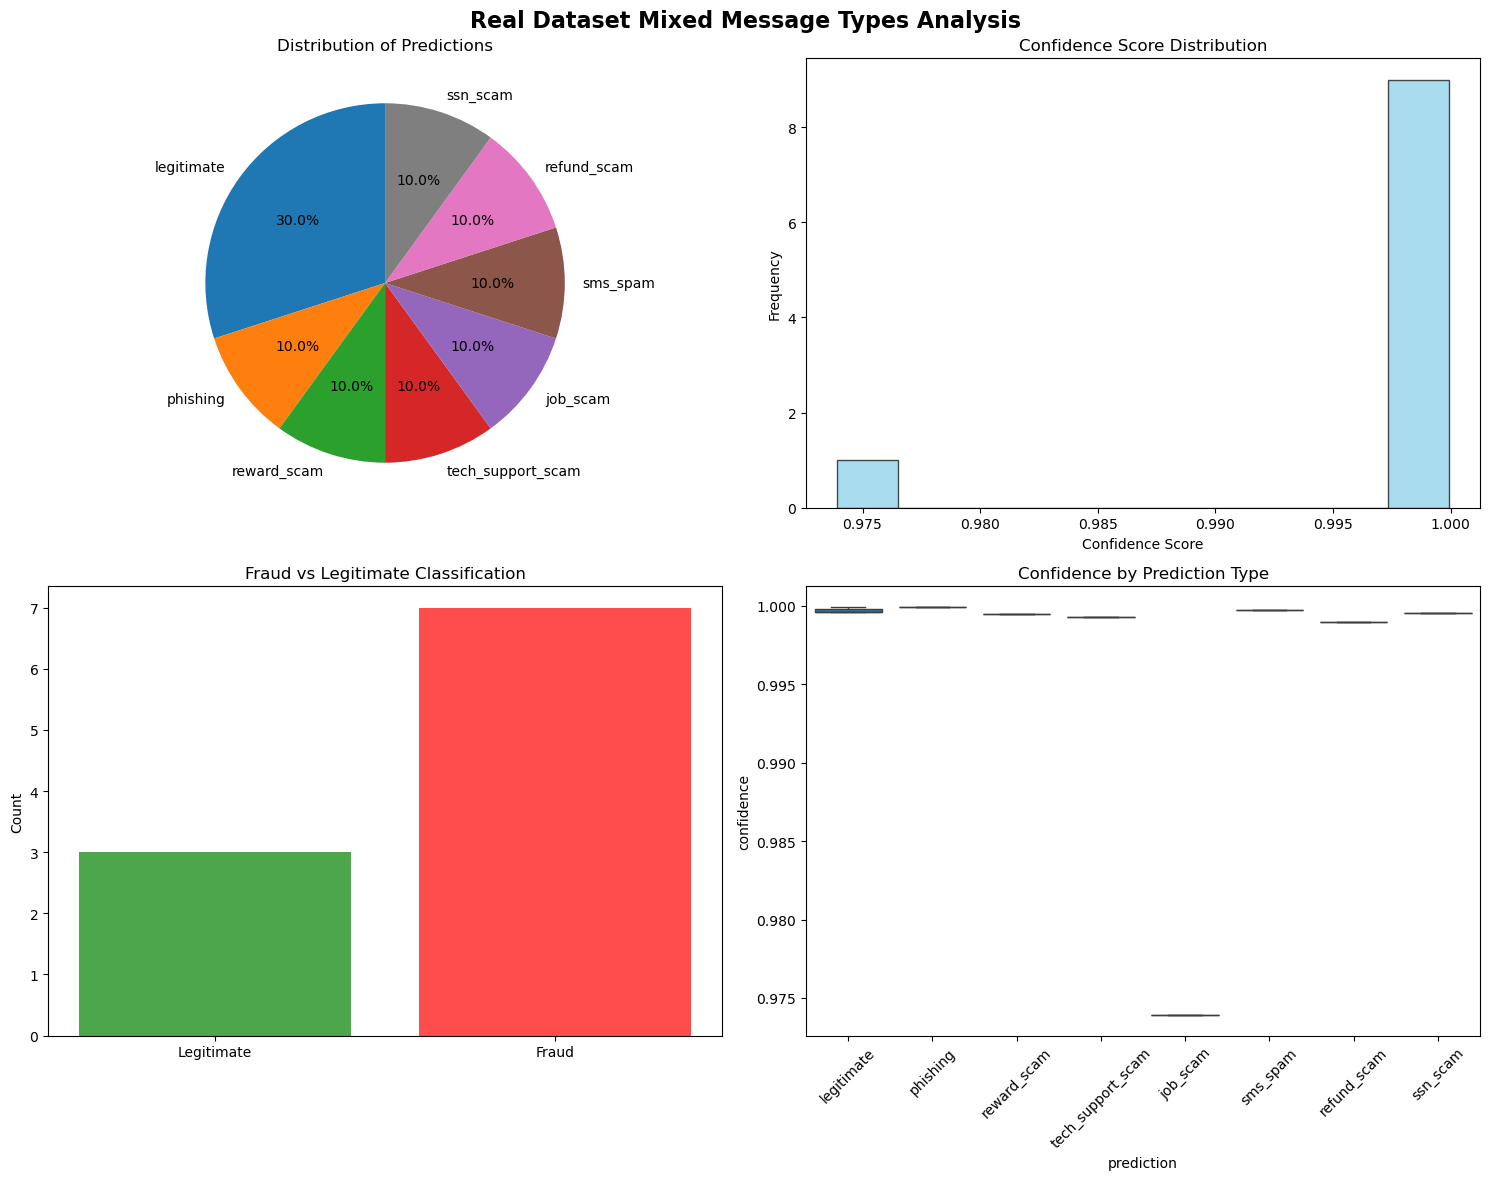


📋 Summary Results (Real Data):
--------------------------------------------------------------------------------
#   STATUS       PREDICTED            CONF   MESSAGE PREVIEW                                   
--------------------------------------------------------------------------------
 1. ✅ SAFE      | legitimate         | 1.000 | About The Selectus Group The Selectus Group is a c...
 2. 🚨 FRAUD     | phishing           | 1.000 | earl griffin martinanemonepattersonfreewarefilesco...
 3. 🚨 FRAUD     | reward_scam        | 0.999 | Suspect: Hello, congratulations! You've been selec...
 4. 🚨 FRAUD     | tech_support_scam  | 0.999 | Suspect: Hello, this is John from Microsoft Techni...
 5. 🚨 FRAUD     | job_scam           | 0.974 | Currently seeking an Office Assistant for our home...
 6. 🚨 FRAUD     | sms_spam           | 1.000 | 🚨HUGE ANNOUNCEMENT🚨 🔥Get ready for the hottest 🔥 s...
 7. 🚨 FRAUD     | refund_scam        | 0.999 | caller: Hello, my name is John and I'm calling fro...
 8.

In [19]:
# Test with a mixed batch of REAL messages from the dataset
print("📊 Creating visualizations for REAL mixed examples from dataset...")

# Get real mixed examples from different categories
mixed_examples = []

# Add samples from each category for comprehensive testing
categories_to_test = ['legitimate', 'phishing', 'reward_scam', 'tech_support_scam', 
                     'job_scam', 'sms_spam', 'refund_scam', 'ssn_scam']

for category in categories_to_test:
    samples = get_real_samples_by_category(df, category, n_samples=1)
    mixed_examples.extend(samples)

# Add a few more legitimate examples for balance
extra_legitimate = get_real_samples_by_category(df, 'legitimate', n_samples=2)
mixed_examples.extend(extra_legitimate)

print(f"📊 Testing {len(mixed_examples)} real examples from {len(categories_to_test)} categories...")
results = visualize_predictions(mixed_examples, "Real Dataset Mixed Message Types Analysis")

# Print summary with category information
print("\n📋 Summary Results (Real Data):")
print("-" * 80)
print(f"{'#':<3} {'STATUS':<12} {'PREDICTED':<20} {'CONF':<6} {'MESSAGE PREVIEW':<50}")
print("-" * 80)

for i, result in enumerate(results, 1):
    text_preview = result['text'][:50] + '...' if len(result['text']) > 50 else result['text']
    fraud_status = "🚨 FRAUD" if result['is_fraud'] else "✅ SAFE"
    print(f"{i:2d}. {fraud_status:<11} | {result['predicted_class']:<18} | {result['confidence']:.3f} | {text_preview}")

# Show category breakdown
print(f"\n📊 Prediction Breakdown:")
predicted_categories = {}
for result in results:
    cat = result['predicted_class']
    predicted_categories[cat] = predicted_categories.get(cat, 0) + 1

for category, count in sorted(predicted_categories.items()):
    print(f"  {category:20s}: {count} predictions")

print(f"\n🎯 Fraud Detection Summary:")
fraud_count = sum(1 for r in results if r['is_fraud'])
total_count = len(results)
print(f"  Total messages tested: {total_count}")
print(f"  Flagged as fraud: {fraud_count}")
print(f"  Flagged as legitimate: {total_count - fraud_count}")
print(f"  Fraud detection rate: {fraud_count/total_count*100:.1f}%")

## 🔄 Batch Testing

You can also test multiple messages at once for efficiency.

In [20]:
def predict_batch(texts, max_length=128, batch_size=16):
    """
    Predict fraud types for multiple texts efficiently
    """
    results = []
    
    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i + batch_size]
        
        # Tokenize batch
        inputs = tokenizer(
            batch_texts,
            max_length=max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        
        # Move to device
        input_ids = inputs['input_ids'].to(device)
        attention_mask = inputs['attention_mask'].to(device)
        
        # Get predictions
        with torch.no_grad():
            outputs = model(input_ids=input_ids, attention_mask=attention_mask)
            logits = outputs.logits
            probabilities = torch.softmax(logits, dim=1)
            predicted_classes = torch.argmax(logits, dim=1)
            confidences = torch.max(probabilities, dim=1)[0]
        
        # Format batch results
        for j, text in enumerate(batch_texts):
            predicted_class_id = predicted_classes[j].item()
            predicted_class = CLASS_LABELS[predicted_class_id]
            confidence = confidences[j].item()
            
            results.append({
                'text': text,
                'predicted_class': predicted_class,
                'confidence': confidence,
                'is_fraud': predicted_class != 'legitimate'
            })
    
    return results

# Example batch prediction with REAL data from dataset
batch_texts = []

# Get diverse real examples for batch testing
sample_categories = ['legitimate', 'phishing', 'tech_support_scam', 'reward_scam', 'sms_spam']
for category in sample_categories:
    samples = get_real_samples_by_category(df, category, n_samples=1)
    batch_texts.extend(samples)

print("⚡ Running batch prediction on REAL dataset examples...")
print(f"📊 Testing {len(batch_texts)} messages from {len(sample_categories)} categories")

batch_results = predict_batch(batch_texts)

print("\n📊 Batch Results (Real Data):")
print("-" * 90)
print(f"{'#':<3} {'STATUS':<12} {'CATEGORY':<20} {'CONFIDENCE':<12} {'MESSAGE PREVIEW':<50}")
print("-" * 90)

for i, result in enumerate(batch_results, 1):
    status = "🚨 FRAUD" if result['is_fraud'] else "✅ SAFE"
    preview = result['text'][:47] + '...' if len(result['text']) > 50 else result['text']
    print(f"{i:2d}. {status:<11} {result['predicted_class']:<19} {result['confidence']:.3f}        {preview}")

# Performance summary
fraud_detected = sum(1 for r in batch_results if r['is_fraud'])
print(f"\n📈 Batch Processing Summary:")
print(f"  Messages processed: {len(batch_results)}")
print(f"  Fraud detected: {fraud_detected}")
print(f"  Legitimate messages: {len(batch_results) - fraud_detected}")
print(f"  Average confidence: {sum(r['confidence'] for r in batch_results) / len(batch_results):.3f}")

⚡ Running batch prediction on REAL dataset examples...
📊 Testing 5 messages from 5 categories

📊 Batch Results (Real Data):
------------------------------------------------------------------------------------------
#   STATUS       CATEGORY             CONFIDENCE   MESSAGE PREVIEW                                   
------------------------------------------------------------------------------------------
 1. ✅ SAFE      legitimate          1.000        About The Selectus Group The Selectus Group is ...
 2. 🚨 FRAUD     phishing            1.000        earl griffin martinanemonepattersonfreewarefile...
 3. 🚨 FRAUD     tech_support_scam   0.999        Suspect: Hello, this is John from Microsoft Tec...
 4. 🚨 FRAUD     reward_scam         0.999        Suspect: Hello, congratulations! You've been se...
 5. 🚨 FRAUD     sms_spam            1.000        🚨HUGE ANNOUNCEMENT🚨 🔥Get ready for the hottest ...

📈 Batch Processing Summary:
  Messages processed: 5
  Fraud detected: 4
  Legitimate messag

## ℹ️ Model Information

Let's examine some details about your trained model.

In [21]:
# Display model information
print("🔍 Model Information:")
print("=" * 50)
print(f"Model Type: {model.__class__.__name__}")
print(f"Number of Parameters: {sum(p.numel() for p in model.parameters()):,}")
print(f"Trainable Parameters: {sum(p.numel() for p in model.parameters() if p.requires_grad):,}")
print(f"Model Device: {next(model.parameters()).device}")
print(f"Model Precision: {next(model.parameters()).dtype}")

print(f"\n📋 Configuration:")
print(f"Number of Classes: {model.config.num_labels}")
print(f"Hidden Size: {model.config.hidden_size}")
print(f"Number of Layers: {model.config.num_hidden_layers}")
print(f"Number of Attention Heads: {model.config.num_attention_heads}")
print(f"Max Position Embeddings: {model.config.max_position_embeddings}")

print(f"\n🎯 Class Labels:")
for i, label in enumerate(CLASS_LABELS):
    print(f"  {i}: {label}")

print(f"\n📊 Tokenizer Info:")
print(f"Vocabulary Size: {tokenizer.vocab_size:,}")
print(f"Model Max Length: {tokenizer.model_max_length}")

🔍 Model Information:
Model Type: BertForSequenceClassification
Number of Parameters: 109,489,161
Trainable Parameters: 109,489,161
Model Device: cpu
Model Precision: torch.float32

📋 Configuration:
Number of Classes: 9
Hidden Size: 768
Number of Layers: 12
Number of Attention Heads: 12
Max Position Embeddings: 512

🎯 Class Labels:
  0: job_scam
  1: legitimate
  2: phishing
  3: popup_scam
  4: refund_scam
  5: reward_scam
  6: sms_spam
  7: ssn_scam
  8: tech_support_scam

📊 Tokenizer Info:
Vocabulary Size: 30,522
Model Max Length: 512
